In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('traffic prediction.csv')

In [3]:
df.head()

,DateTime,Vehicles
0,01-11-2015 00:00,15
1,01-11-2015 01:00,13
2,01-11-2015 02:00,10
3,01-11-2015 03:00,7
4,01-11-2015 04:00,9


In [4]:
df.dtypes

DateTime    object
Vehicles     int64
dtype: object

In [5]:
df['DateTime']=pd.to_datetime(df['DateTime'])

In [6]:
df.dtypes

DateTime    datetime64[ns]
Vehicles             int64
dtype: object

In [7]:
daytraffic=df.resample('d',on='DateTime').sum()

In [9]:
daytraffic.head()

,Vehicles
DateTime,
2015-01-11,596
2015-01-12,898
2015-01-13,0
2015-01-14,0
2015-01-15,0


In [10]:
monthtraffic=df.resample('m',on='DateTime').sum()

In [11]:
monthtraffic.head()

,Vehicles
DateTime,
2015-01-31,1494
2015-02-28,1897
2015-03-31,1787
2015-04-30,1658
2015-05-31,1369


In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
adfuller(daytraffic)

(-3.6234211296848393,
 0.00532873327574687,
 16,
 1044,
 {'1%': -3.43662916802936,
  '5%': -2.864312406409634,
  '10%': -2.5682461404339336},
 15857.436111703406)

<AxesSubplot:xlabel='DateTime'>

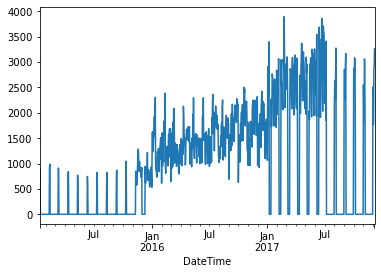

In [19]:
daytraffic['Vehicles'].plot(kind='line')

In [16]:
#since p-value is less than 0.05 so itb is stationary data 
#we can reject the null hypothesis

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

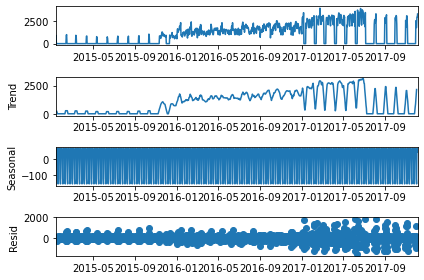

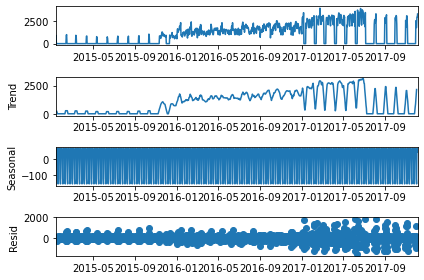

In [18]:
seasonal_decompose(daytraffic).plot()

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

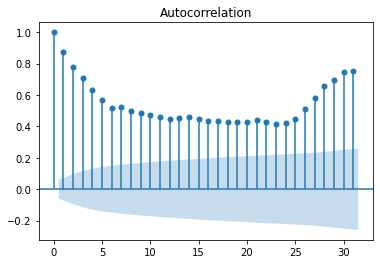

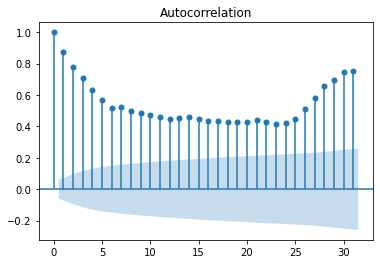

In [21]:
plot_acf(daytraffic)

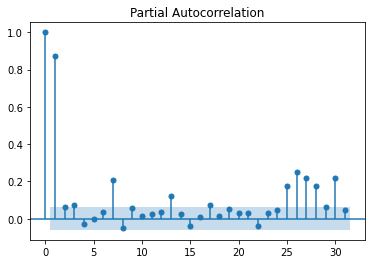

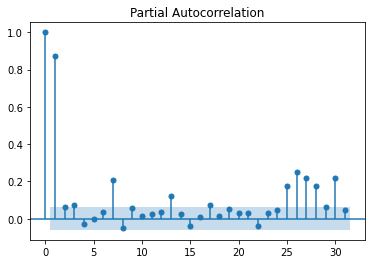

In [22]:
plot_pacf(daytraffic)

In [23]:
from pmdarima import auto_arima

In [24]:
arimamodel=auto_arima(daytraffic,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16295.293, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16282.028, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16277.246, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16293.317, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16187.863, Time=1.66 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16189.825, Time=3.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16189.823, Time=2.75 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=16262.491, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16266.570, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=16186.112, Time=0.77 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=16275.273, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=16280.058, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=16188.071, Time=1.39 sec
 ARIMA(1,1,2)(0,0,0)[0]  

In [25]:
arimamodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1061
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -8090.056
Date:                Fri, 03 Sep 2021   AIC                          16186.112
Time:                        16:00:09   BIC                          16201.010
Sample:                             0   HQIC                         16191.758
                               - 1061                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7510      0.019     40.051      0.000       0.714       0.788
ma.L1         -0.9744      0.007   -137.751      0.000      -0.988      -0.960
sigma2      2.486e+05   6323.232     39.320      0.000    2.36e+05    2.61e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              8052.87
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              14.13   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
#since p-value is greater than 0.05 so fail to reject null hypothesis.
#this is best parameters

In [31]:
arimapredict=arimamodel.predict(n_periods=30)
arimapredict

array([2672.31204085, 2233.18817618, 1903.38872416, 1655.69624535,
       1469.66936238, 1329.95578951, 1225.0253508 , 1146.21842644,
       1087.03129826, 1042.57941574, 1009.1942876 ,  984.12073124,
        965.2894952 ,  951.14648949,  940.52453083,  932.54701828,
        926.55558971,  922.05578904,  918.67626014,  916.13809979,
        914.23184062,  912.80016433,  911.7249186 ,  910.91736638,
        910.31086261,  909.85535421,  909.51324932,  909.25631497,
        909.06334707,  908.91842052])

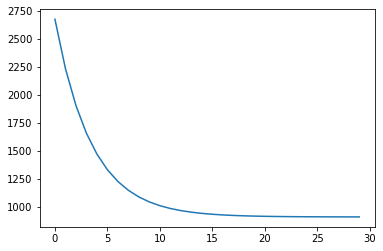

In [30]:
plt.plot(arimapredict)

In [28]:
from statsmodels.tsa.arima.model import ARIMA

In [32]:
arima=ARIMA(daytraffic,order=(1,1,1))

In [33]:
arimamodel=arima.fit()

In [34]:
arimapredict=arimamodel.predict()

In [36]:
arimares=daytraffic-arimapredict

In [37]:
np.sqrt(arimamodel.mse)

499.2021022162043

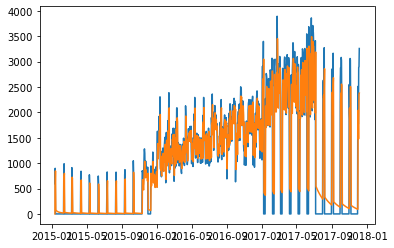

In [39]:
plt.plot(daytraffic)
plt.plot(arimapredict)

In [44]:
daytraffic=daytraffic.reset_index()

In [45]:
daytraffic.head()

,DateTime,Vehicles
0,2015-01-11,596
1,2015-01-12,898
2,2015-01-13,0
3,2015-01-14,0
4,2015-01-15,0


In [46]:
daytraffic['dayofweek']=daytraffic['DateTime'].dt.dayofweek

In [47]:
daytraffic['weekofyear']=daytraffic['DateTime'].dt.weekofyear

<ipython-input-47-e65e789ed9ed>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  daytraffic['weekofyear']=daytraffic['DateTime'].dt.weekofyear


In [48]:
daytraffic['month']=daytraffic['DateTime'].dt.month

In [50]:
daytraffic['isstartmonth']=daytraffic['DateTime'].dt.is_month_start

In [51]:
daytraffic['isendmonth']=daytraffic['DateTime'].dt.is_month_end

In [52]:
daytraffic.head()

,DateTime,Vehicles,dayofweek,weekofyear,month,isstartmonth,isendmonth
0,2015-01-11,596,6,2,1,False,False
1,2015-01-12,898,0,3,1,False,False
2,2015-01-13,0,1,3,1,False,False
3,2015-01-14,0,2,3,1,False,False
4,2015-01-15,0,3,3,1,False,False


In [53]:
y=daytraffic['Vehicles']
X=daytraffic.drop(['Vehicles','DateTime'],axis=1)

In [55]:
Xd=pd.get_dummies(X,columns=X.columns)

In [59]:
Xd.shape

(1061, 76)

In [54]:
from sklearn.linear_model import LinearRegression

In [56]:
lr=LinearRegression()

In [57]:
lrmodel=lr.fit(Xd,y)

In [61]:
lrmodel.score(Xd,y)

0.10486796107324614

In [62]:
lrpredict=lrmodel.predict(Xd)

In [63]:
lrres=y-lrpredict

In [64]:
np.sqrt(np.mean(lrres**2))

994.0455043185824

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
dt=DecisionTreeRegressor(max_depth=8)

In [71]:
dtmodel=dt.fit(Xd,y)

In [72]:
dtmodel.score(Xd,y)

0.14134837710658077

In [73]:
dtpredict=dtmodel.predict(Xd)

In [74]:
dtres=y-dtpredict

In [75]:
np.sqrt(np.mean(dtres**2))

973.5790324917903

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
cross_val_score(dt,Xd,y)

array([-7.74799376e+01, -1.70501384e+00, -1.08021465e+01, -2.08590216e+00,
       -7.26180882e-02])

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
rf=RandomForestRegressor(n_estimators=1000)

In [81]:
rfmodel=rf.fit(Xd,y)

In [82]:
rfmodel.score(Xd,y)

0.29286593028224683

In [83]:
rfpredict=rfmodel.predict(Xd)

In [84]:
rfres=y-rfpredict

In [85]:
np.sqrt(np.mean(rfres**2))

883.514325419695

In [87]:
cross_val_score(rf,Xd,y)

array([-74.28111926,  -1.62613375, -10.99876685,  -2.33492347,
        -0.10890019])

In [88]:
from sklearn.ensemble import GradientBoostingRegressor

In [89]:
gb=GradientBoostingRegressor(n_estimators=1000)

In [90]:
gbmodel=gb.fit(Xd,y)

In [91]:
gbmodel.score(Xd,y)

0.2920211062318021

In [92]:
gbpre=gbmodel.predict(Xd)

In [93]:
gbres=y-gbpre

In [94]:
np.sqrt(np.mean(gbres**2))

884.0419420188041

In [106]:
cross_val_score(gb,Xd,y)

array([-79.40567767,  -2.09375086, -11.48616867,  -2.35585573,
        -0.12118753])

In [95]:
from xgboost import XGBRegressor

In [98]:
xgb=XGBRegressor(n_estimators=1000,learning_rate=0.95)

In [99]:
xgbmodel=xgb.fit(Xd,y)

In [100]:
xgbmodel.score(Xd,y)

0.31444782062755794

In [101]:
xgbpre=xgbmodel.predict(Xd)

In [103]:
xgbres=y-xgbpre

In [104]:
np.sqrt(np.mean(xgbres**2))

869.9273248866511

In [105]:
cross_val_score(xgb,Xd,y)

array([-81.130382  ,  -2.22796165, -13.31873947,  -2.48565553,
        -0.12100252])